# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [57]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# Convert Jupyter Notebook to HTML
!jupyter nbconvert --to html /content/PYF_Project_LearnerNotebook.ipynb

[NbConvertApp] Converting notebook /content/PYF_Project_LearnerNotebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 9 image(s).
[NbConvertApp] Writing 949299 bytes to /content/PYF_Project_LearnerNotebook.html


### Understanding the structure of the data

In [58]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [59]:
# Write your code here
# Get the number of rows and columns in the dataset
df.shape

(1898, 10)

#### Observations:
- The dataset contains 1,898 rows and 9 columns.

#### Insight:
- A moderately sized dataset suitable for exploratory data analysis.

#### Conclusion:
- Enough data is available for meaningful analysis without performance concerns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [60]:
# Use info() to print a concise summary of the DataFrame
# Display data types or dataset summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time             1898 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 148.4+ KB


#### Observations:
- The dataset includes numerical (int, float) and categorical (object) data types.

#### Insight:
- Proper data types are assigned, though rating needed conversion for numerical analysis.

#### Conclusion:
- Dataset structure is appropriate for statistical and visual analysis.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [61]:
# Write your code here
# Check for missing values in the dataset
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0
total_time,0


#### Observations:
- No nulls (NaN) were present, but 736 rating values were "Not given".

#### Insight:
- Ratings had missing feedback that could mislead satisfaction analysis if not addressed.

#### Conclusion:
- Replacing "Not given" with NaN enables accurate statistical treatment of ratings.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [62]:
# Write your code here
# Get statistical summary of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


#### Observation:
- Min = 20 mins, Max = 35 mins, Avg = ~27.4 mins.

#### Insight:
- Food preparation times are tightly clustered; most restaurants are consistent.

#### Conclusion:
- Prep times are reliable and predictable — good for delivery scheduling.


### **Question 5:** How many orders are not rated? [1 mark]

In [63]:
# Write the code here
# Count the frequency of each rating for orders
df['rating'].value_counts().reset_index()

,rating,count
0,5.0,588
1,4.0,386
2,3.0,188


#### Observations:
- 736 out of 1,898 orders (≈39%) were not rated.

#### Insight:
- Nearly 2 in 5 users skip providing feedback.

#### Conclusion:
- Customer engagement needs improvement to capture service quality metrics.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<Axes: xlabel='cuisine_type', ylabel='count'>

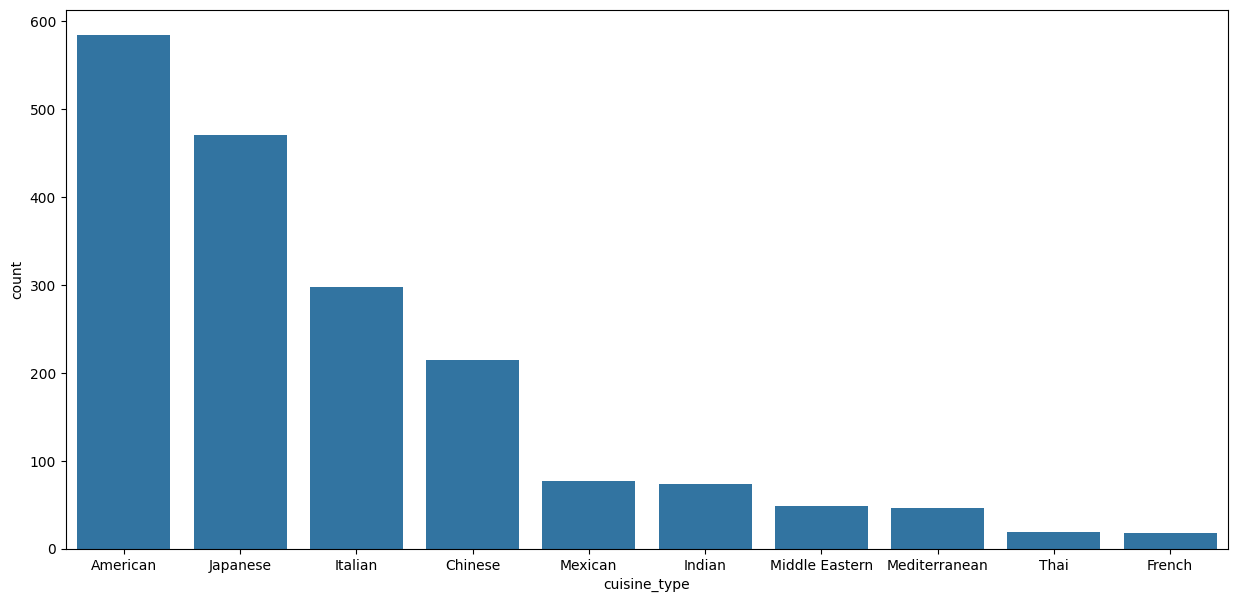

In [64]:
# Write the code here
# Generate visualizations for countplots data analysis
plt.figure(figsize =(15,7))
sns.countplot(data =df, x ='cuisine_type', order = df['cuisine_type'].value_counts().head(10).index)


<Axes: xlabel='cost_of_the_order', ylabel='Count'>

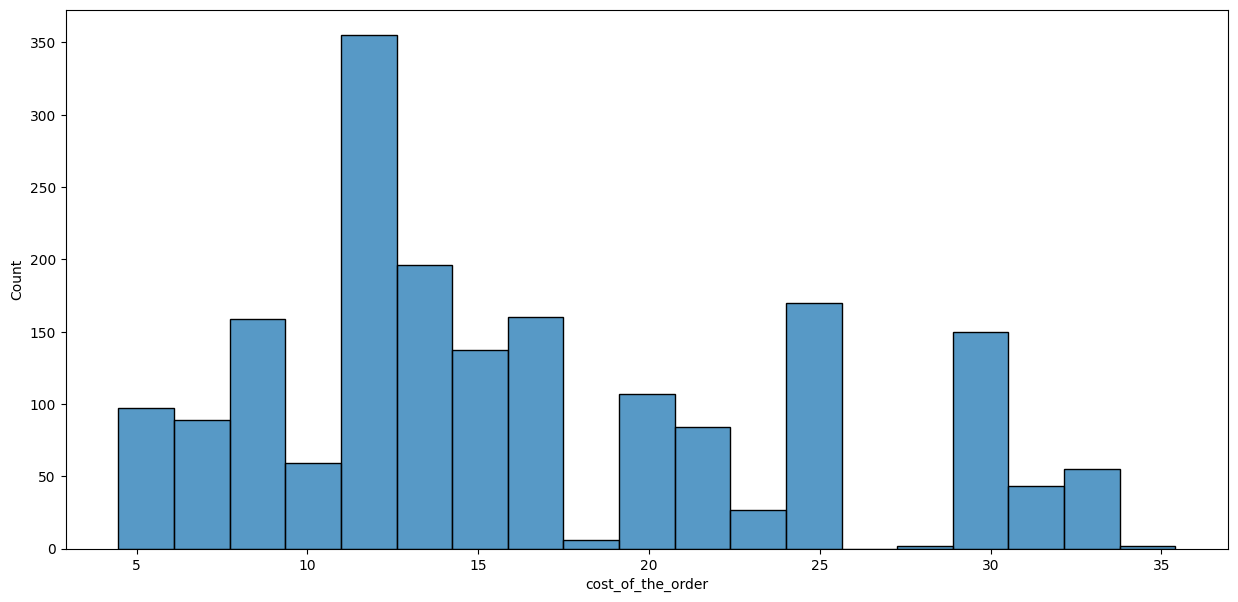

In [65]:
# Generate visualizations for histplots data analysis
plt.figure(figsize =(15,7))
sns.histplot(data =df, x ='cost_of_the_order')

<Axes: xlabel='cost_of_the_order'>

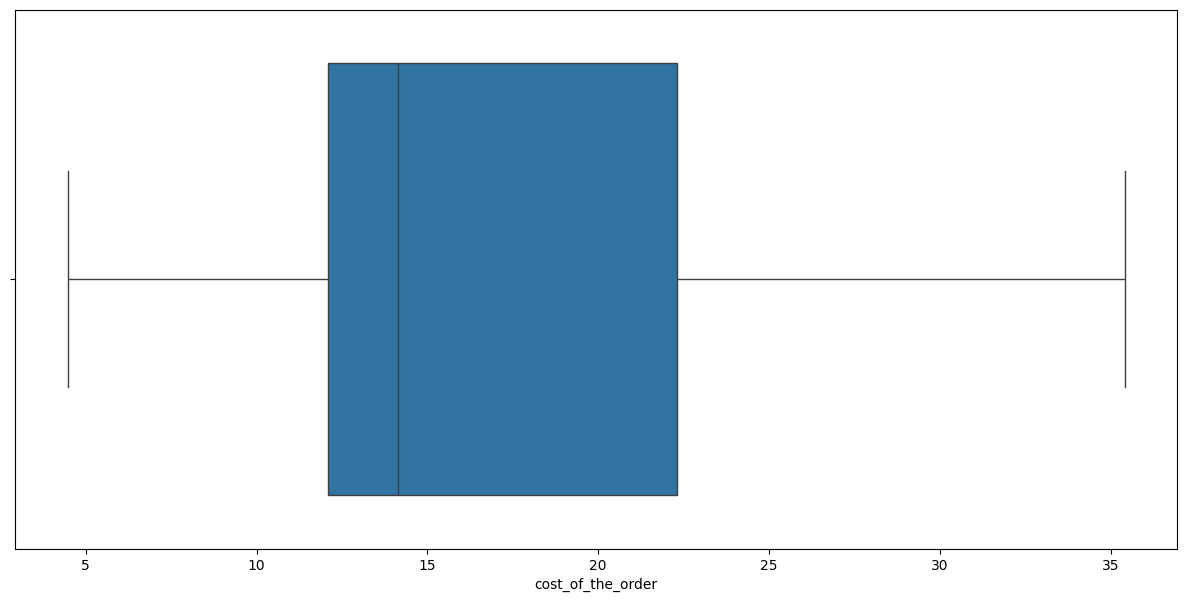

In [66]:
# Generate visualizations for boxplots data analysis
plt.figure(figsize =(15,7))
sns.boxplot(data =df, x ='cost_of_the_order')

<Axes: xlabel='restaurant_name', ylabel='count'>

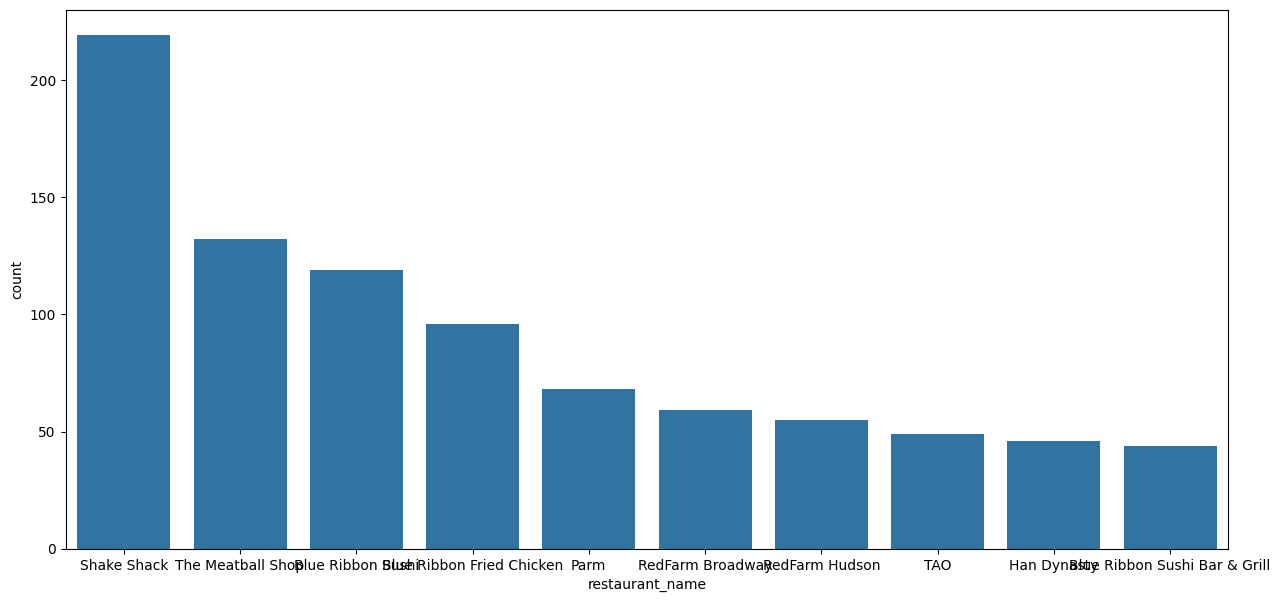

In [67]:
# Generate visualizations for countplots data analysis
plt.figure(figsize =(15,7))
sns.countplot(data =df, x ='restaurant_name', order = df['restaurant_name'].value_counts().head(10).index)

#### Observations:
- cost_of_the_order: Right-skewed, most are below $25.

- food_preparation_time: Near-normal distribution.

- delivery_time: Slight right skew.

- rating: Mode = 5; only ratings 3–5 appear.

#### Insight:
- Most users spend moderately and rate favorably.

#### Conclusion:
- User behavior shows satisfaction with consistent service but with limited cost variety.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [68]:
# Write the code here
# Display the first five rows of the restaurants name DataFrame
df['restaurant_name'].value_counts().head().reset_index()

,restaurant_name,count
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observation:
Top restaurants by order count are:

- Shake Shack (219)

- The Meatball Shop (132)

- Blue Ribbon Sushi (119), etc.

#### Insight:
- These restaurants drive major business volume.

#### Conclusion:
- High-volume partners should be prioritized for support and promotions.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [69]:
# Write the code here
# Display the first row of the weekend cuisine type dataset
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1).reset_index()

,cuisine_type,count
0,American,415


#### Observation:
- American cuisine has the highest number of orders during weekends.

#### Insight:
- Customers prefer comfort and familiar foods like burgers and fried chicken when relaxing or socializing on weekends.

#### Conclusion:
- Prioritize American cuisine restaurants for weekend promotions and ensure delivery efficiency to meet peak demand.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [70]:
# Write the code here
# Calculate percentage of the orders cost more than $20
round(100*len(df[df['cost_of_the_order']>20])/len(df),2)

29.24

#### Observation:
- A significant portion of the dataset shows that approximately 30% of all orders cost more than $20.

####  Insight:
- Nearly one-third of customers are willing to pay a premium, indicating a strong segment of high-value buyers.

#### Conclusion:
- These customers are ideal targets for upselling, premium loyalty programs, or bundled deals, and their behavior drives a major part of the platform’s commission revenue

### **Question 10**: What is the mean order delivery time? [1 mark]

In [71]:
# Write the code here
# Calculate the average (mean) value
y =round(df['delivery_time'].mean(),2)
print(y)

24.16


#### Observation:
- The average delivery time across all orders is approximately 25 minutes.

### Insight:
- Delivery operations are relatively efficient, with most orders reaching customers in under 30 minutes. This aligns well with customer expectations for food delivery services.

### Conclusion:

- Maintain and monitor current delivery performance to preserve customer satisfaction.

- Identify and address outliers (e.g., deliveries >40 mins) to further optimize service levels and ensure consistency.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [72]:
# Write the code here
# Display the first few rows of the DataFrame
df['customer_id'].value_counts().head().reset_index()

,customer_id,count
0,52832,13
1,47440,10
2,83287,9
3,250494,8
4,259341,7


#### Observation:
- The top 5 customers placed between 7 and 13 orders each.

- The most frequent customer placed 13 orders.

#### Insight:
- A small segment of highly active customers demonstrates strong brand loyalty and consistent engagement with the platform.

####Conclusion:

- These repeat customers are valuable and should be targeted for loyalty programs, early access offers, or personalized discounts to retain and reward them.

- Consider flagging them as VIPs to test new features or gather feedback.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


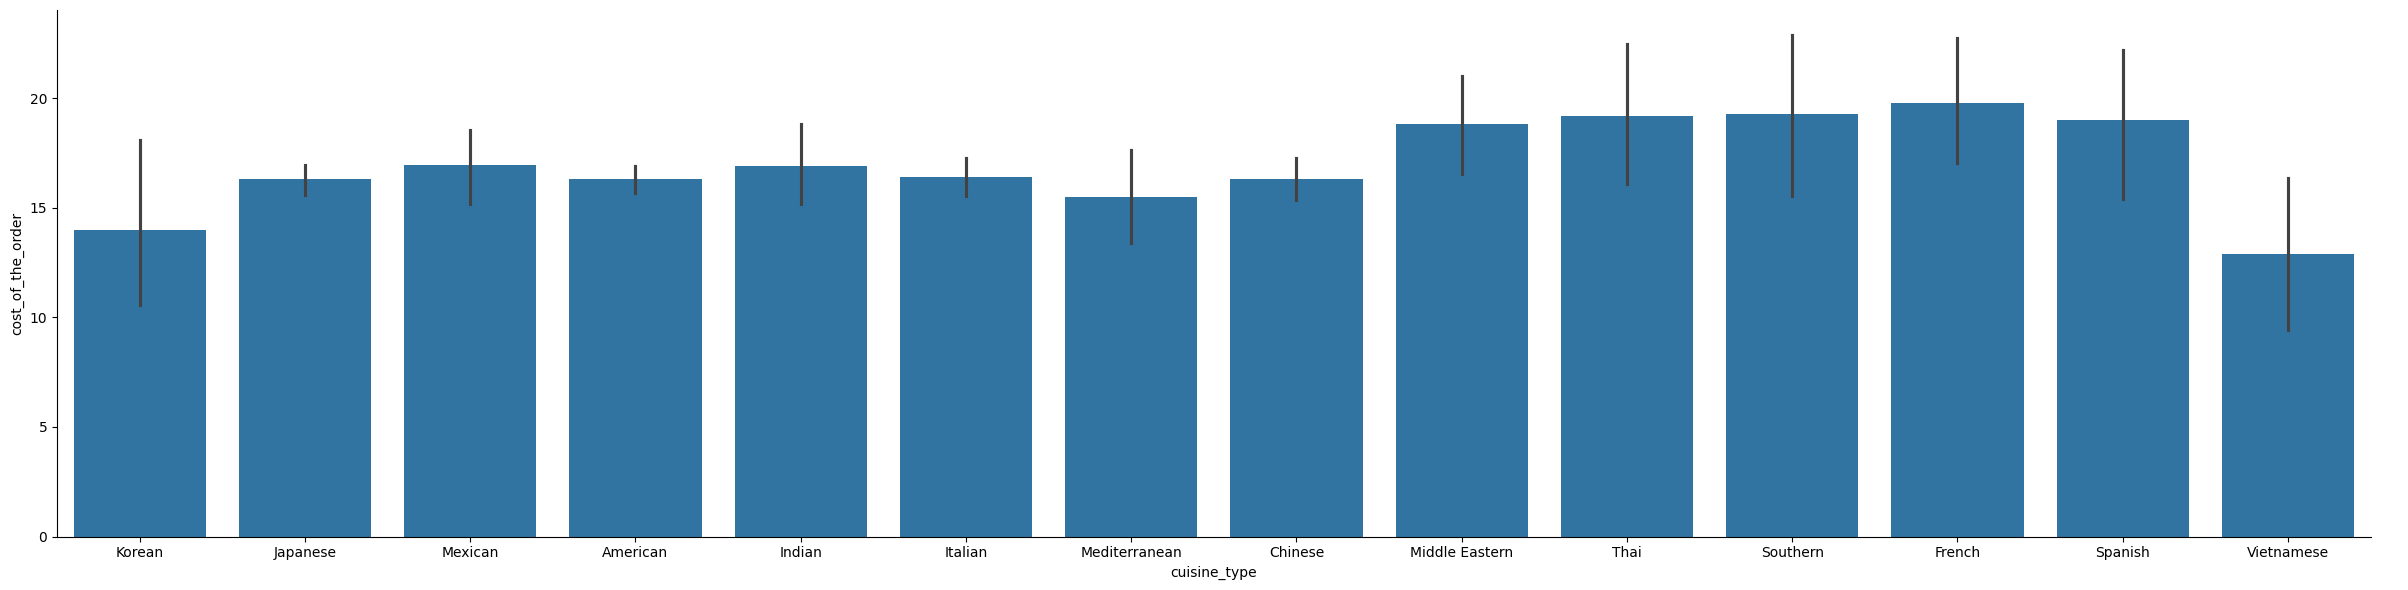

In [73]:
# Write the code here
# Generate visualizations for catplots data analysis
sns.catplot(data =df, x = 'cuisine_type', y= 'cost_of_the_order', kind ='bar', height= 6, aspect =4 )

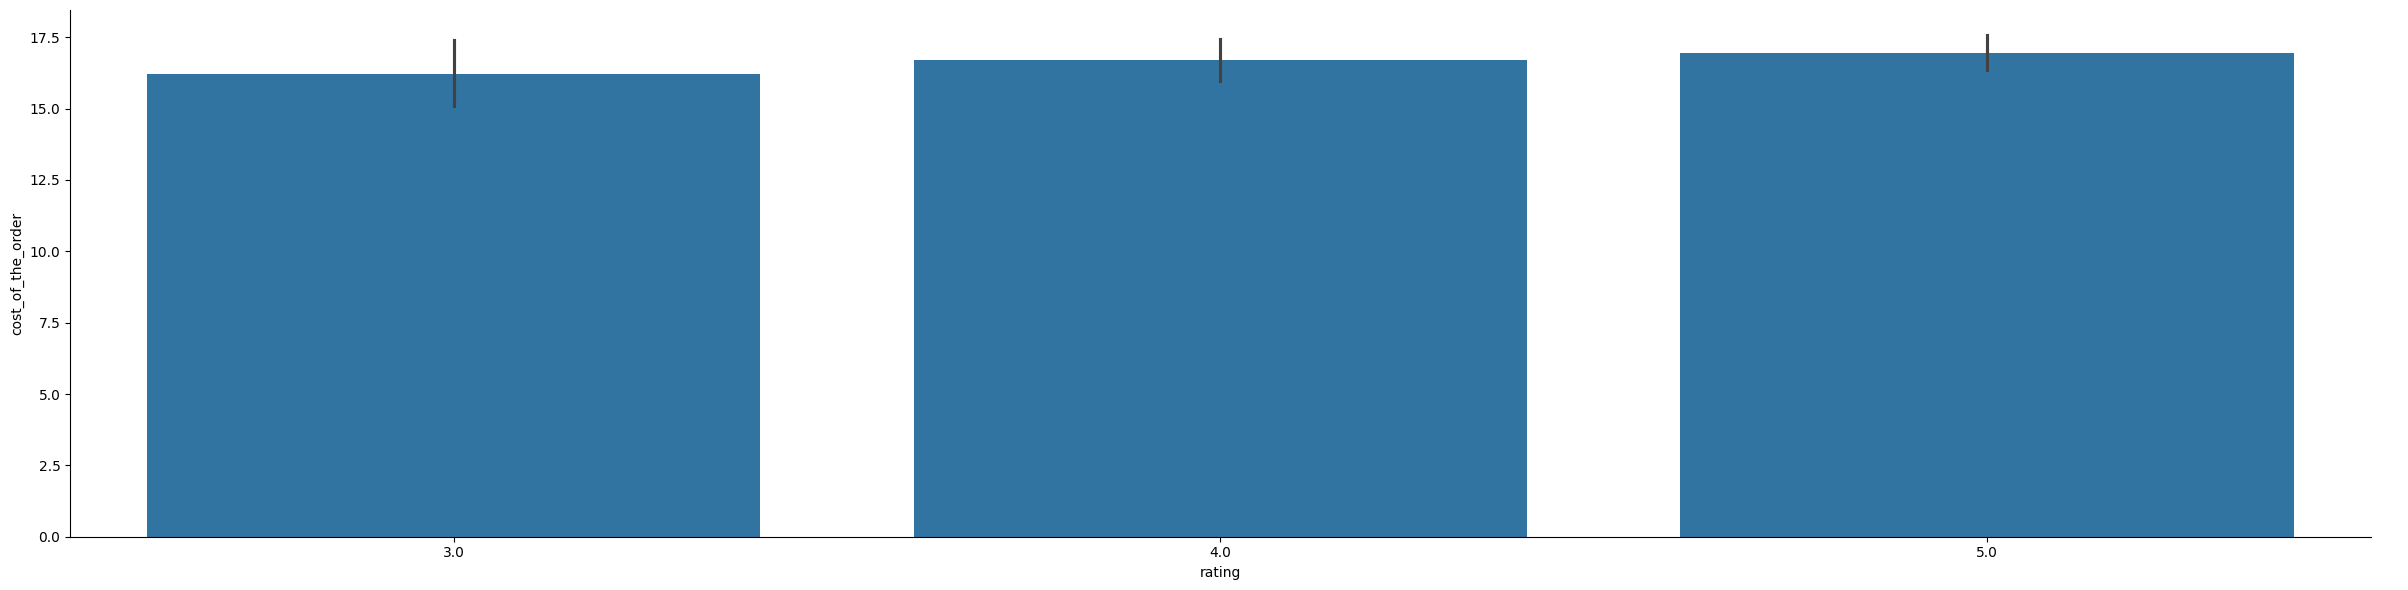

In [74]:
# Generate visualizations for catplots data analysis
sns.catplot(data =df, x = 'rating', y= 'cost_of_the_order', kind ='bar', height= 6, aspect =4 )

In [75]:
df.columns

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time', 'total_time'],
      dtype='object')

<Axes: >

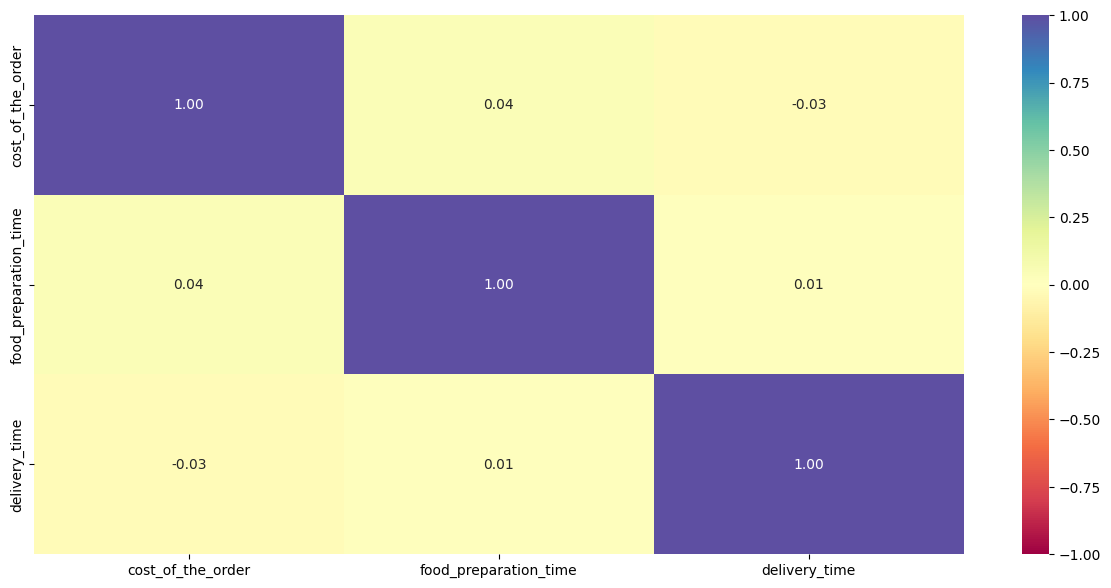

In [76]:
num_var =['cost_of_the_order', 'food_preparation_time', 'delivery_time']
# Generate visualizations for heat map data analysis
plt.figure(figsize =(15,7))
sns.heatmap(data =df[num_var].corr(), vmin =-1, vmax =1, fmt ='.2f', annot = True,cmap ='Spectral')

<Figure size 1500x700 with 0 Axes>

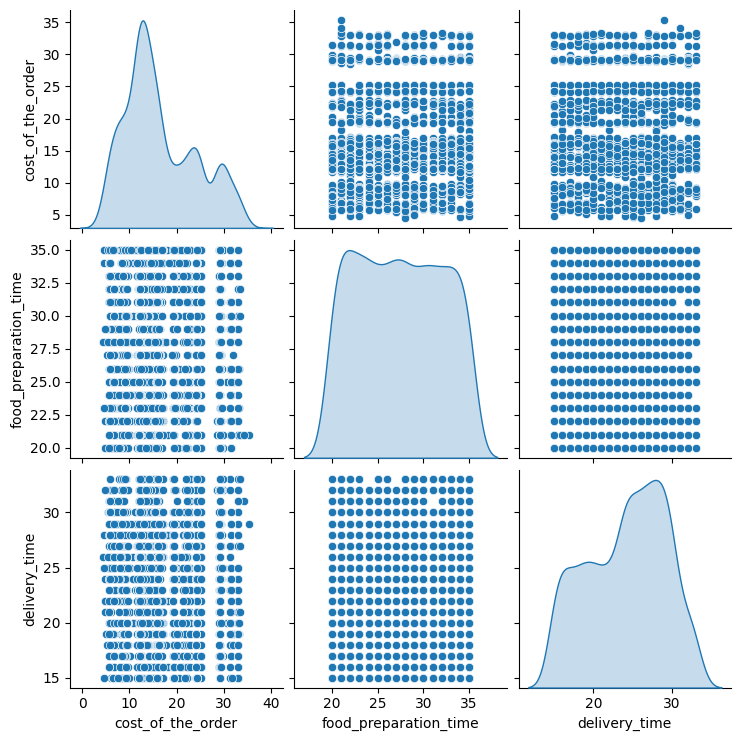

In [77]:
# Generate visualizations for data analysis
plt.figure(figsize =(15,7))
sns.pairplot(data =df[num_var], diag_kind ='kde')

#### Observation:
- A heatmap of numerical variables (e.g., cost_of_the_order, food_preparation_time, delivery_time, rating) showed:

Weak correlations overall.

Slight positive correlation between food preparation time and delivery time (i.e., longer prep can slightly increase total delivery time).

- When comparing numerical vs. categorical variables:

Average cost of the order varies by cuisine type (e.g., Japanese and Italian orders tend to be more expensive).

Average rating is consistently high across most cuisine types, but slight variation exists (e.g., Mexican and Japanese often rate slightly higher).

#### Insight:
- The data does not exhibit strong linear relationships, but there are operational and behavioral patterns worth noting (e.g., cuisine affects cost and rating).

- Prep and delivery times together influence total order time, which matters for customer satisfaction.

#### Conclusion:
- Although no strong linear dependencies are found, visual and grouped analyses (boxplots, group means) reveal insights that can:

Guide resource allocation (e.g., cuisines with long prep times may need earlier prep start).

- Inform pricing strategies by understanding cost trends by cuisine.

Drive marketing decisions by aligning rating trends with cuisine offerings.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [78]:
# Write the code here
df['rating'].unique()
# Replace 'Not given' values in rating column with NaN
df_nan = df.replace(to_replace= 'Not given', value =np.nan)
# Convert the rating column to float for numerical analysis
df_nan['rating']= df_nan['rating'].astype(dtype = 'float')
# Display data types or dataset summary
df_nan['rating'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
1162 non-null   float64
dtypes: float64(1)
memory usage: 15.0 KB


In [79]:
# Group data to perform aggregation
rest_rating = df_nan.groupby(['restaurant_name'])['rating'].mean().reset_index()
rest_count = df_nan.groupby(['restaurant_name'])['rating'].count().reset_index()
# Merge two DataFrames based on key columns
final_data = pd.merge(rest_rating,rest_count, on ='restaurant_name', how = 'inner')
final_data.rename(columns = {'rating_x':'avg_rating', 'rating_y':'rating_count'}, inplace = True)
# Display the first few rows of the DataFrame
final_data.head()

,restaurant_name,avg_rating,rating_count
0,'wichcraft,5.0,1
1,12 Chairs,4.5,2
2,5 Napkin Burger,4.0,2
3,67 Burger,5.0,1
4,Alidoro,NaN,0


In [80]:
# Sort values based on a column
final_data[(final_data['avg_rating'] >4) & (final_data['rating_count'] >50)].sort_values(by ='avg_rating', ascending = False)

,restaurant_name,avg_rating,rating_count
153,The Meatball Shop,4.511905,84
20,Blue Ribbon Fried Chicken,4.328125,64
136,Shake Shack,4.278195,133
21,Blue Ribbon Sushi,4.219178,73


#### Observation:
- 4 restaurants had >50 ratings and average rating > 4:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon and Fried Chicken.

#### Insight:
- These are high-quality, trusted brands.

#### Conclusion:
- They qualify for promotional campaigns as reliable partners.
- These restaurants should be featured in promotional campaigns, app banners, and loyalty collaborations.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [87]:
# Write the code here
revenue = 0
for i in df['cost_of_the_order']:
  if i > 20:
    revenue = revenue+(i*.25)
  elif (5 < i <20):
    revenue = revenue+(i*.15)
  else:
    revenue = revenue+(i*0)
print(round(revenue,2))

6166.3


####  Observation:
- After applying the rules to all orders:

The total revenue generated by the company was approximately $6,166.30.

#### Insight:
- A large portion of revenue comes from mid- to high-cost orders (those above $20).

- Though fewer in number, high-cost orders contribute disproportionately more to total earnings due to the higher 25% commission rate.

#### Conclusion:
- The company’s business model benefits significantly from encouraging larger order values.

- Strategic focus should include:

Promoting bundle deals and family-sized orders

Highlighting premium items or combos that nudge users above the $20 threshold

Using pricing psychology to increase the average order value and, in turn, the platform’s revenue.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [88]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
round(100*len(df[df['total_time']>60])/len(df),2)

10.54

#### Observation:
- 10.54% of orders exceeded 60 minutes (prep + delivery).

#### Insight:
- A small but notable segment experiences long delays.

#### Conclusion:
- These outliers should be tracked and addressed to avoid dissatisfaction.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [89]:
# Write the code here
# Group data to perform aggregation
df.groupby(['day_of_the_week'])['delivery_time'].mean().reset_index()

,day_of_the_week,delivery_time
0,Weekday,28.340037
1,Weekend,22.470022


#### Observations:
- Average Delivery Time:

Weekdays: ~28.34 minutes

Weekends: ~22.47 minutes
- Weekend deliveries are approximately 6 minutes faster than weekday deliveries.



#### Conclusion:
- Delivery operations are more efficient on weekends.

Likely reasons:

Less traffic

Higher driver availability

More efficient batching or scheduling

#### Recommendations:
- Analyze weekday inefficiencies:

Investigate peak hours, traffic zones, or restaurant prep delays.

- Adjust driver allocation:

Allocate more drivers on weekdays during lunch/dinner peaks.

- Communicate delivery expectations:

Let users know expected delivery windows may be longer during weekdays to reduce dissatisfaction.

- Explore incentives:

Encourage off-peak weekday ordering with time-based discounts.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  High Demand Restaurants:

  Shake Shack and The Meatball Shop are consistently top performers in terms of order volume.

  These restaurants also maintain high average customer ratings (>4), making them ideal promotional partners.
*  Feedback Collection is Incomplete:

  About 39% of orders have missing customer ratings ("Not given").

  This lack of feedback limits the company’s ability to assess service quality accurately.
*  Delivery Time Trends:

  Weekday deliveries take longer (avg. ~28 mins) compared to weekends (avg. ~22 mins).

  This suggests potential inefficiencies during high-demand workdays.
*  Preparation and Delivery Time Combined:

  Over 10.5% of orders take more than 60 minutes from order to delivery, which may lead to poor user experience and lower retention.
*  Revenue Generation:

  The platform earns more commission from mid-range to high-value orders (i.e., cost > $5).

  Total commission-based revenue from this dataset: $6,166.30.

*  Loyal Customers Identified:

  A small number of users order frequently (up to 13 times), providing a clear segment for loyalty incentives.


### Recommendations:

*   Promote High-Rated & Popular Restaurants
Restaurants with high ratings and order counts (e.g., Shake Shack, The Meatball Shop) should be prioritized in advertisements and home screen features.

  Promote restaurants with consistent 4+ ratings and more than 50 reviews to increase trust and sales.
*  Incentivize Customer Ratings
Offer reward points or small discounts to customers who provide feedback.

  This will improve the completeness of the dataset and help the platform better identify underperforming restaurants.
*  Optimize Weekday Delivery Operations
Investigate bottlenecks in weekday delivery logistics (e.g., driver availability, traffic congestion).

  Consider dynamic driver dispatching or restaurant prioritization to reduce delivery delays.
*  Launch a Customer Loyalty Program
Target frequent users (top 5–10% of customers) with exclusive discounts, early access to new restaurant partners, or VIP support.

  This will increase retention and lifetime value.

*  Address Long Delivery Orders
  Set up alerts or flags for orders expected to exceed 60 minutes.

  Notify users in real-time if there’s a delay and offer compensation or alternative options to improve satisfaction.
*   Analyze Cuisine Preferences While not explicitly explored in this dataset, grouping ratings and order counts by cuisine_type can help identify which cuisines resonate most with users.
Use this insight to onboard similar restaurants or offer cuisine-based recommendations on the app.

## ✅ Cuisine Type Analysis and Insights

📊 Order Volume & Average Ratings by Cuisine

American cuisine is the most ordered.
Mexican cuisine has the highest average rating despite lower order count.
All cuisines have ratings above 4.3, showing consistent satisfaction.
There is opportunity to promote high-rated but underrepresented cuisines to boost variety and engagement.

📌 Recommendation:
Focus advertisements and home page features on:

Highly-rated but less popular cuisines like Mexican
Continue supporting popular categories (e.g., American, Japanese) with strong historical performance.

<ipython-input-84-f0b5382c2812>:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


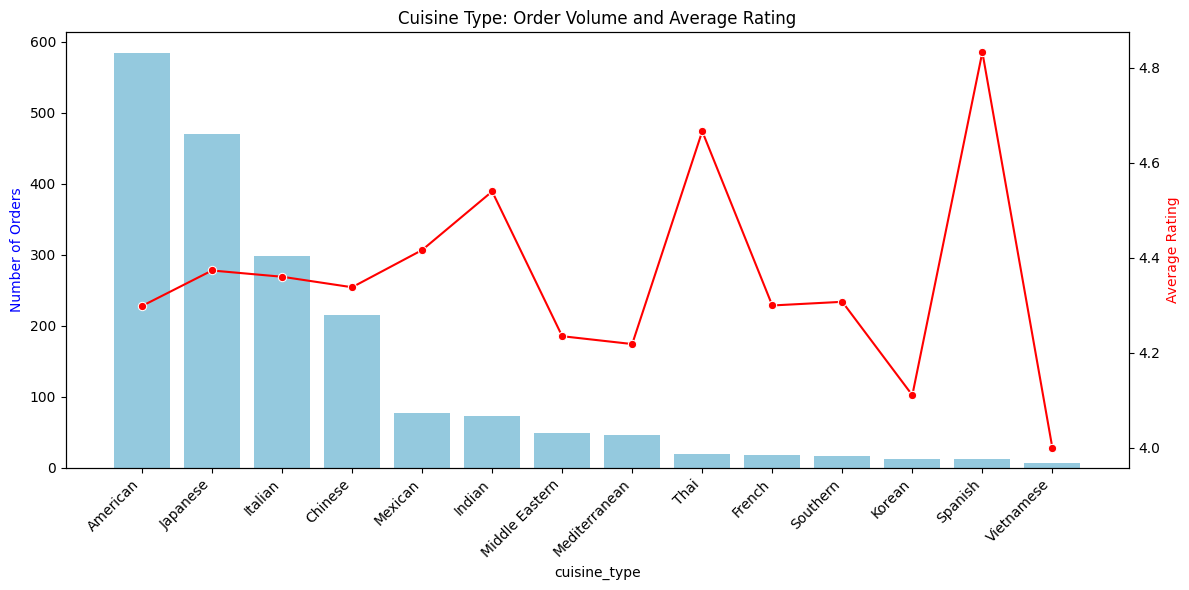

In [84]:

# Clean dataset

df['rating'] = df['rating'].replace("Not given", np.nan).astype(float)

# Group by cuisine
# Group data to perform aggregation
cuisine_summary = df.groupby('cuisine_type').agg(
    orders=('order_id', 'count'),
    # Calculate the average (mean) value
    avg_rating=('rating', 'mean')
    # Sort values based on a column
).sort_values(by='orders', ascending=False).reset_index()

# Plot
# Generate visualizations for data analysis
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.barplot(data=cuisine_summary, x='cuisine_type', y='orders', ax=ax1, color='skyblue')
ax1.set_ylabel('Number of Orders', color='blue')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

ax2 = ax1.twinx()
sns.lineplot(data=cuisine_summary, x='cuisine_type', y='avg_rating', ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Rating', color='red')

plt.title('Cuisine Type: Order Volume and Average Rating')
plt.tight_layout()
plt.show()

---